In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv(r"student_data.csv")

In [3]:
df.head().T

,0,1,2,3,4
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other
studytime,2,2,2,3,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   address     395 non-null    object
 3   famsize     395 non-null    object
 4   Pstatus     395 non-null    object
 5   Medu        395 non-null    int64 
 6   Fedu        395 non-null    int64 
 7   Mjob        395 non-null    object
 8   Fjob        395 non-null    object
 9   studytime   395 non-null    int64 
 10  failures    395 non-null    int64 
 11  schoolsup   395 non-null    object
 12  famsup      395 non-null    object
 13  paid        395 non-null    object
 14  activities  395 non-null    object
 15  nursery     395 non-null    object
 16  higher      395 non-null    object
 17  internet    395 non-null    object
 18  romantic    395 non-null    object
 19  famrel      395 non-null    int64 
 20  freetime  

In [5]:
df.describe()

,age,Medu,Fedu,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
df.isnull().sum()

sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# EDA

In [7]:
df['address'].value_counts()

address
U    307
R     88
Name: count, dtype: int64

In [8]:
df['sex'].value_counts()

sex
F    208
M    187
Name: count, dtype: int64

In [9]:
df['internet'].value_counts()

internet
yes    329
no      66
Name: count, dtype: int64

In [10]:
cols_string = df.columns

# data distributions

In [11]:
col_counts = dict(df.count(axis=0))
col_types = {c: d for c, d in dict(df.dtypes).items()   if col_counts[c] > 10 }
_is_num = lambda x: x in (np.int64, float)
# separate them
cols_numerical = sorted([col for col, dtp in col_types.items() if _is_num(dtp)])
cols_string = sorted([col for col, dtp in col_types.items() if not _is_num(dtp)])
print(f"NUMERICAL: {cols_numerical}")
print(f"CATEGORICAL: {cols_string}")

NUMERICAL: ['Dalc', 'Fedu', 'G1', 'G2', 'G3', 'Medu', 'Walc', 'absences', 'age', 'failures', 'famrel', 'freetime', 'goout', 'health', 'studytime']
CATEGORICAL: ['Fjob', 'Mjob', 'Pstatus', 'activities', 'address', 'famsize', 'famsup', 'higher', 'internet', 'nursery', 'paid', 'romantic', 'schoolsup', 'sex']


In [12]:
plt.rcParams["font.family"] = "monospace"
sns.set_theme(style='darkgrid', palette='rocket')

# String Data Distributions

nb_pies=12 | nb_rows=12


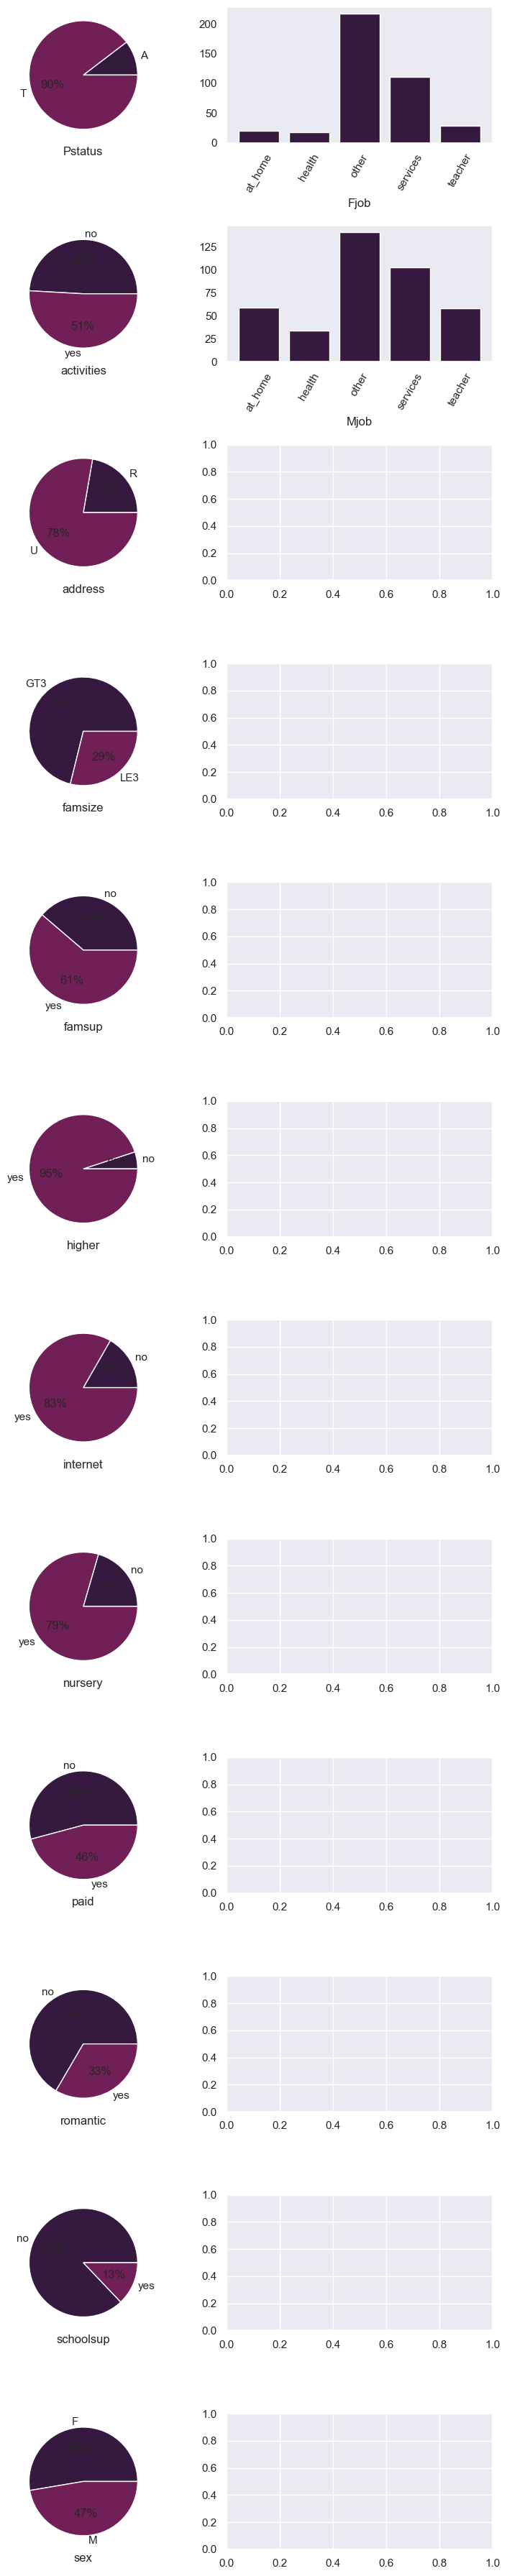

In [13]:
nb_pies = sum([len(df[c].dropna().unique()) < 5 for c in cols_string])
nb_rows = max([nb_pies, len(cols_string) - nb_pies])
print(f"{nb_pies=} | {nb_rows=}")

fig, axarr = plt.subplots(ncols=2, nrows=nb_rows, figsize=(8, 3 * nb_rows))
i_0, i_1 = 0, 0
for col in cols_string:
    vals = df[col].values
    vals = vals[~pd.isnull(vals)] 
    unique_values, counts = np.unique(vals, return_counts=True) 
    
    if len(unique_values) < 5:
        axarr[i_0, 0].pie(counts, labels=unique_values, autopct='%.0f%%')
        axarr[i_0, 0].set_xlabel(col)
        i_0 += 1
        
    else:
        axarr[i_1, 1].bar(unique_values, counts)
        axarr[i_1, 1].set_xlabel(col)
        axarr[i_1, 1].grid()
        axarr[i_1, 1].tick_params(axis='x', labelrotation=60)
        #plt.xticks(rotation=45, ha='center')
        i_1 += 1
fig.tight_layout()

# numerical data distributions

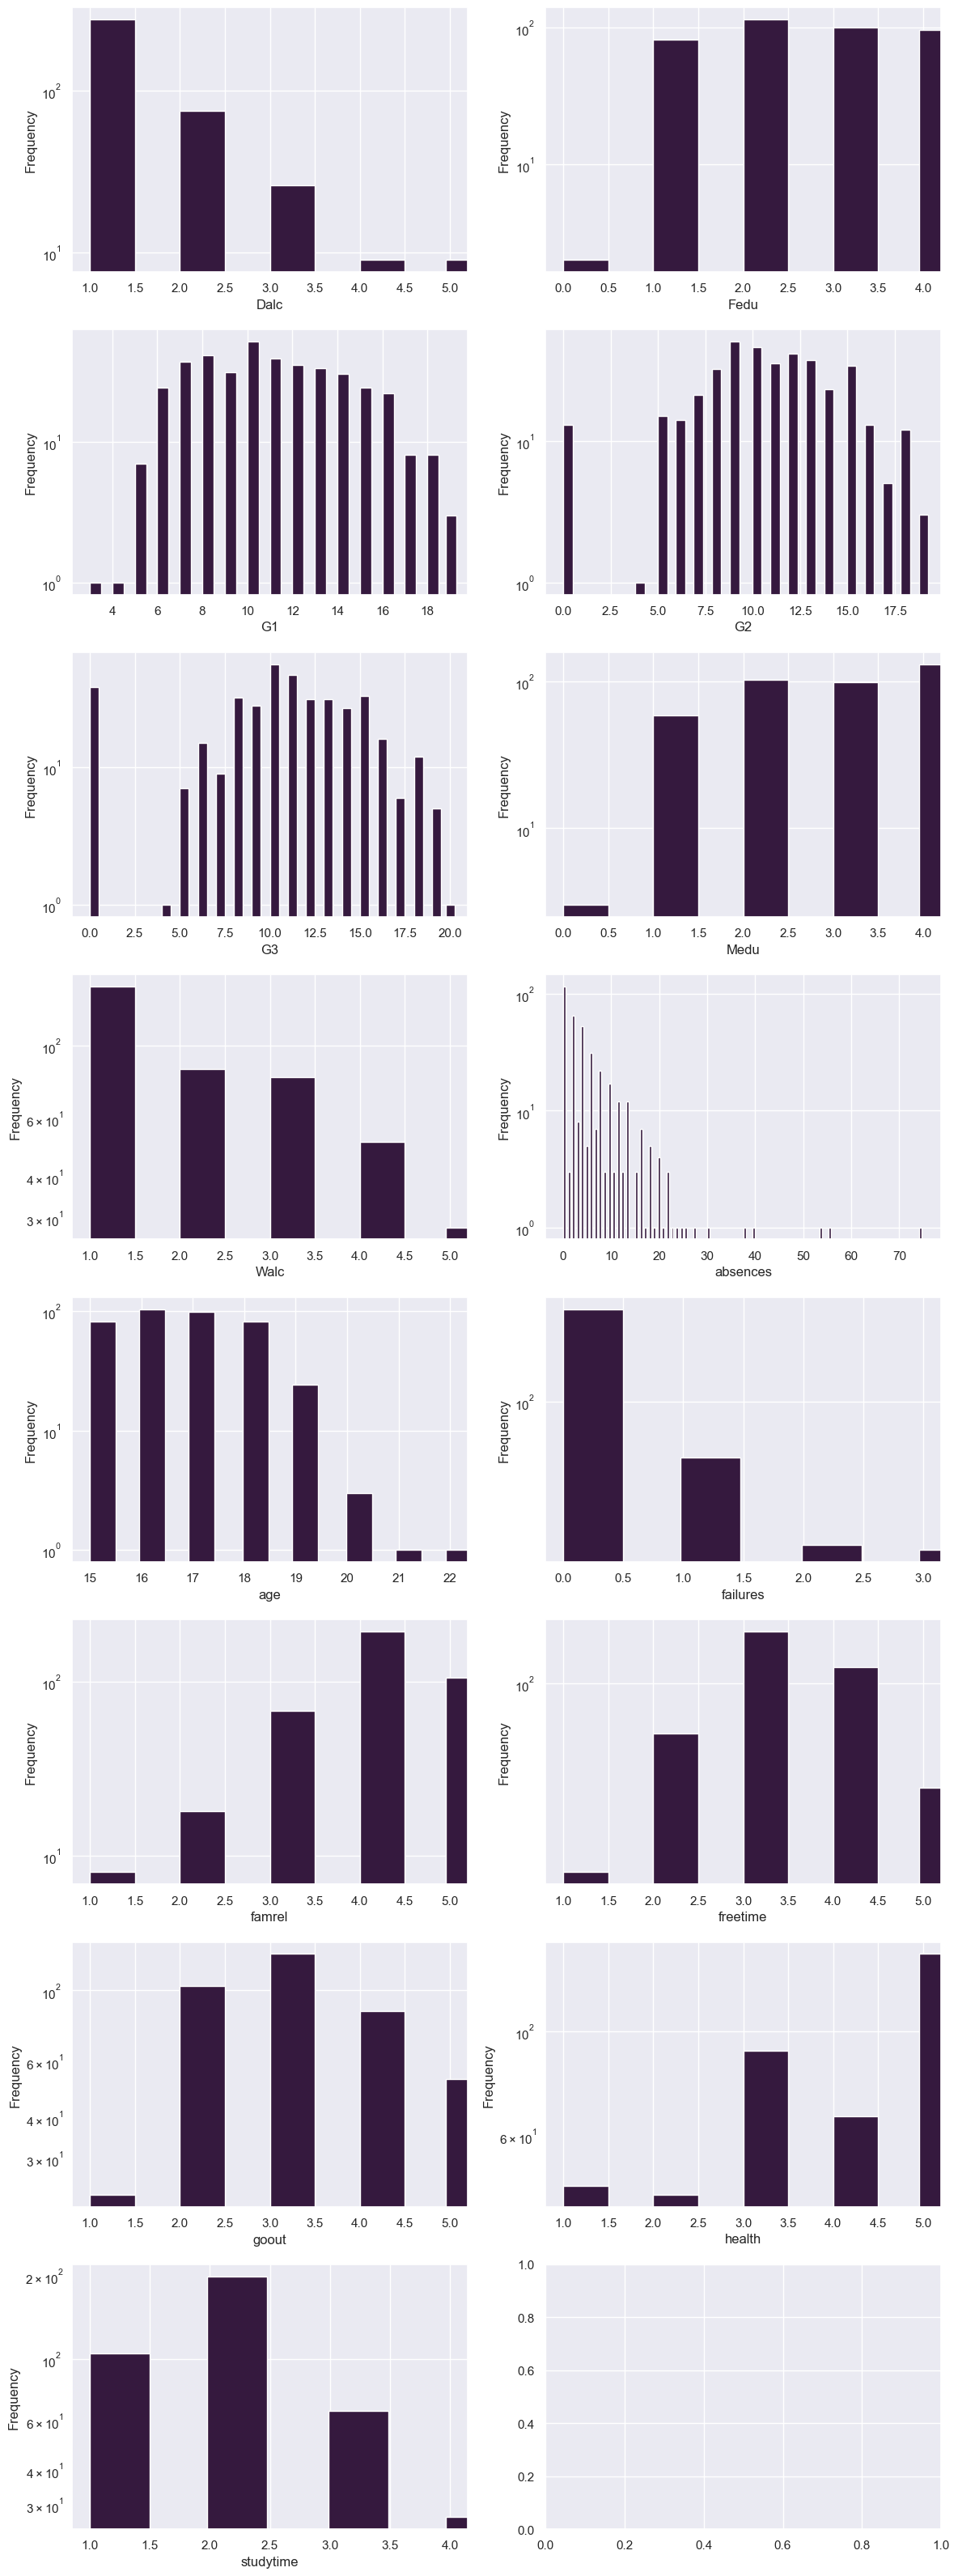

In [14]:
import math

num_of_rows = math.ceil(len(cols_numerical) / 2)
fig, axarr = plt.subplots(ncols=2, nrows=num_of_rows, figsize=(12, 4 * num_of_rows))
for i, col in enumerate(cols_numerical):
    ax = axarr[i // 2, i % 2] 
    df[col].plot.hist(ax=ax, bins=80, logy=True, xlabel=col, grid=True , width = 0.5)
fig.tight_layout() 

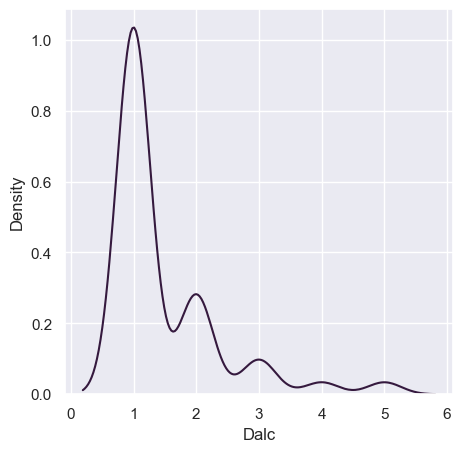

Dalc 
 Dalc
1    276
2     75
3     26
5      9
4      9
Name: count, dtype: int64


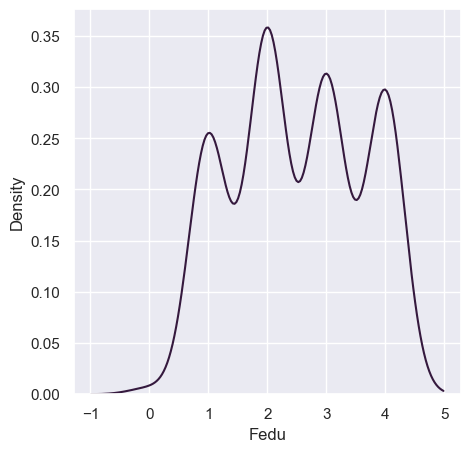

Fedu 
 Fedu
2    115
3    100
4     96
1     82
0      2
Name: count, dtype: int64


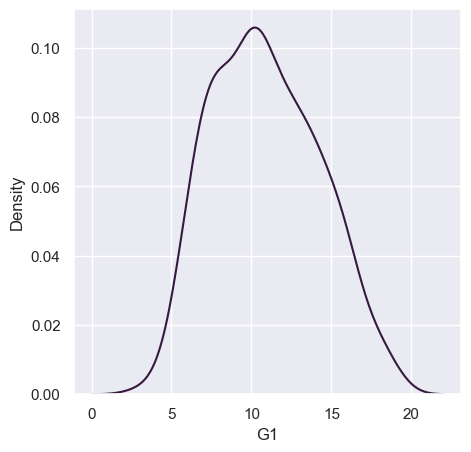

G1 
 G1
10    51
8     41
11    39
7     37
12    35
13    33
9     31
14    30
15    24
6     24
16    22
18     8
17     8
5      7
19     3
4      1
3      1
Name: count, dtype: int64


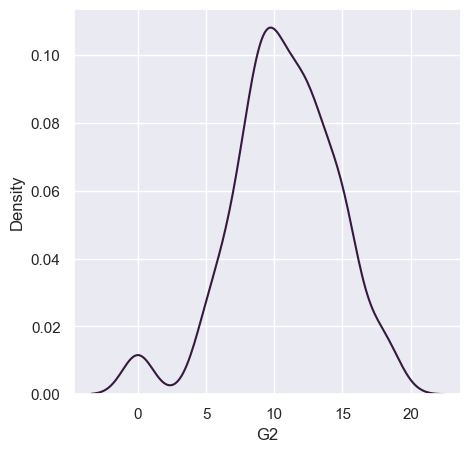

G2 
 G2
9     50
10    46
12    41
13    37
11    35
15    34
8     32
14    23
7     21
5     15
6     14
0     13
16    13
18    12
17     5
19     3
4      1
Name: count, dtype: int64


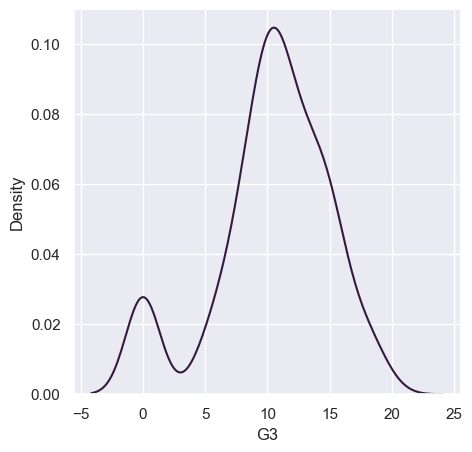

G3 
 G3
10    56
11    47
0     38
15    33
8     32
12    31
13    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: count, dtype: int64


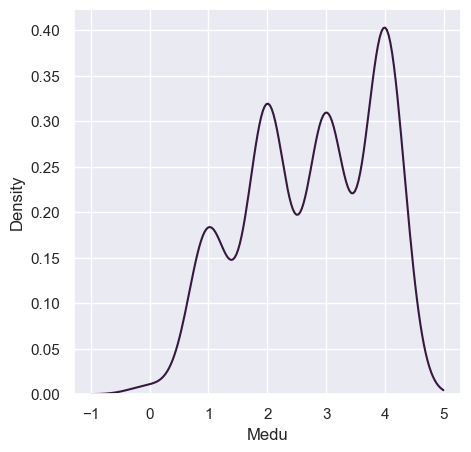

Medu 
 Medu
4    131
2    103
3     99
1     59
0      3
Name: count, dtype: int64


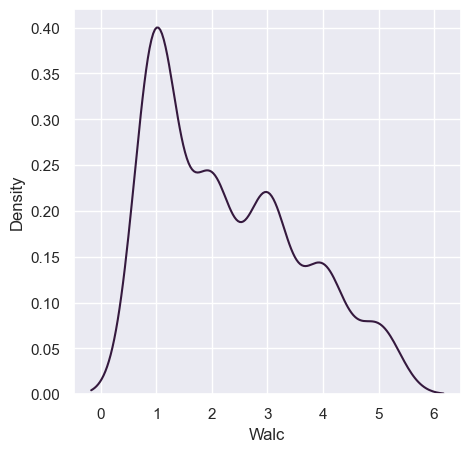

Walc 
 Walc
1    151
2     85
3     80
4     51
5     28
Name: count, dtype: int64


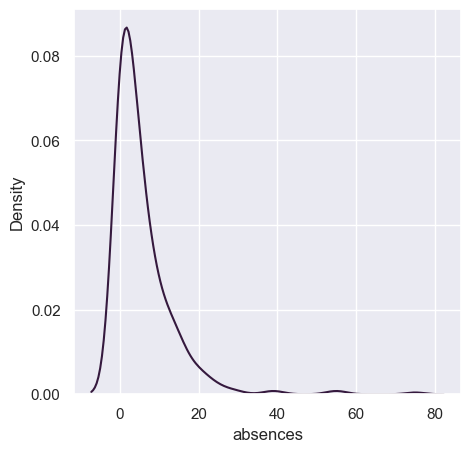

absences 
 absences
0     115
2      65
4      53
6      31
8      22
10     17
14     12
12     12
3       8
7       7
16      7
18      5
5       5
20      4
13      3
15      3
1       3
22      3
9       3
11      3
28      1
24      1
54      1
25      1
56      1
26      1
75      1
21      1
19      1
30      1
38      1
40      1
23      1
17      1
Name: count, dtype: int64


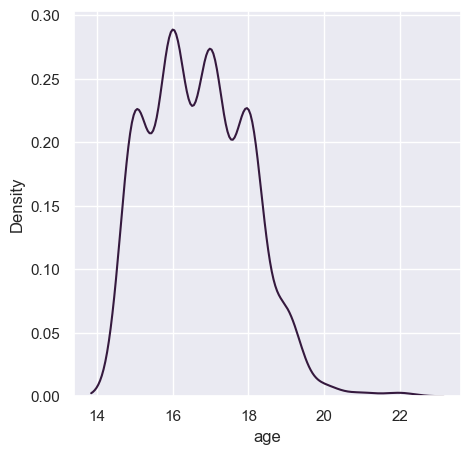

age 
 age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64


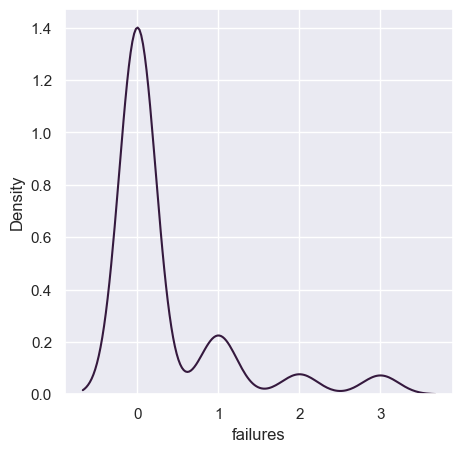

failures 
 failures
0    312
1     50
2     17
3     16
Name: count, dtype: int64


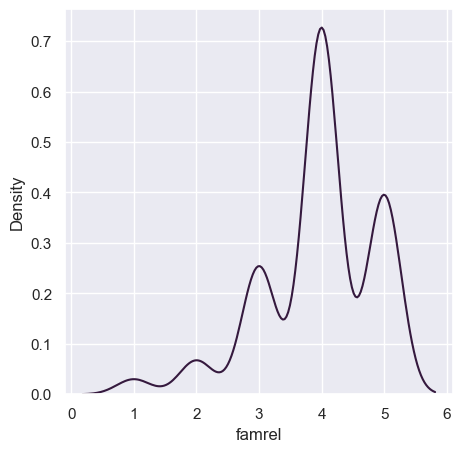

famrel 
 famrel
4    195
5    106
3     68
2     18
1      8
Name: count, dtype: int64


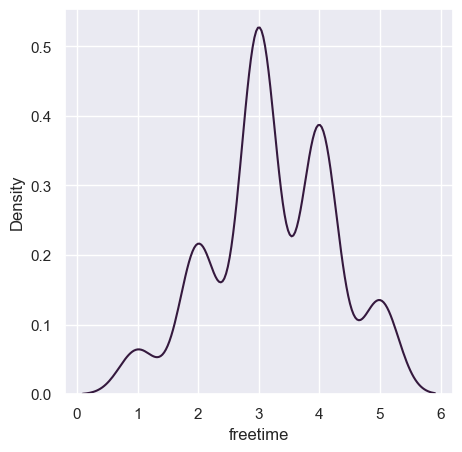

freetime 
 freetime
3    157
4    115
2     64
5     40
1     19
Name: count, dtype: int64


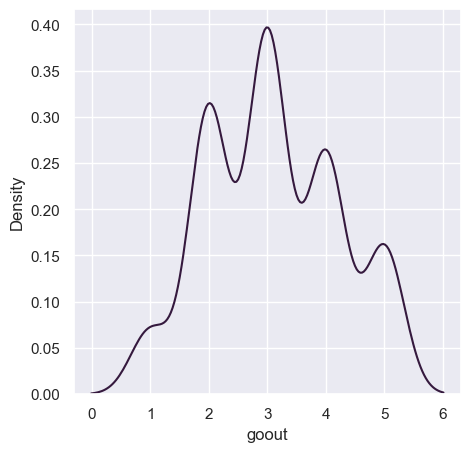

goout 
 goout
3    130
2    103
4     86
5     53
1     23
Name: count, dtype: int64


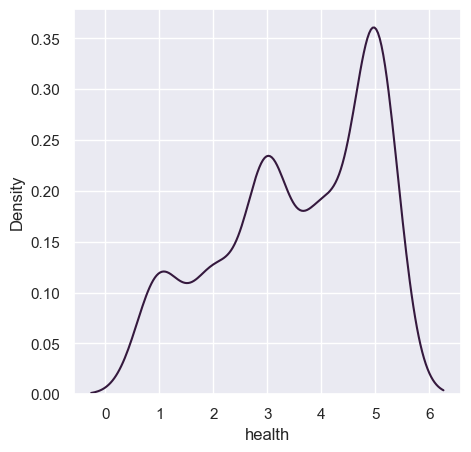

health 
 health
5    146
3     91
4     66
1     47
2     45
Name: count, dtype: int64


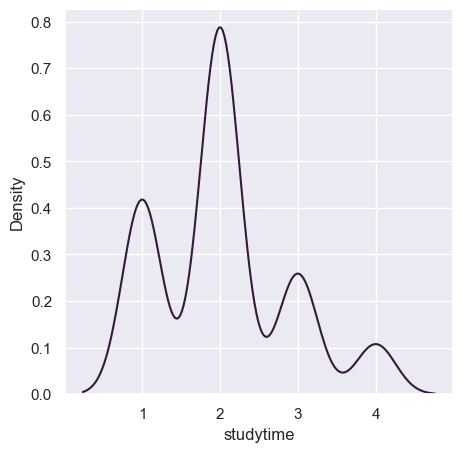

studytime 
 studytime
2    198
1    105
3     65
4     27
Name: count, dtype: int64


In [15]:
def hist_plot(col_2):
        plt.figure(figsize=(5,5))
        sns.kdeplot(data=df, x=col_2)

        plt.show()
        print(col_2,"\n",df[col_2].value_counts())

for i in cols_numerical:
        hist_plot(i)

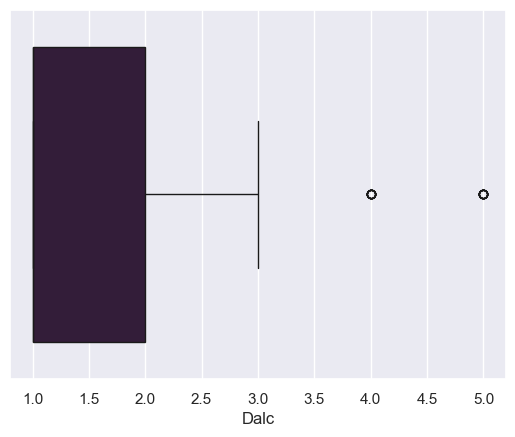

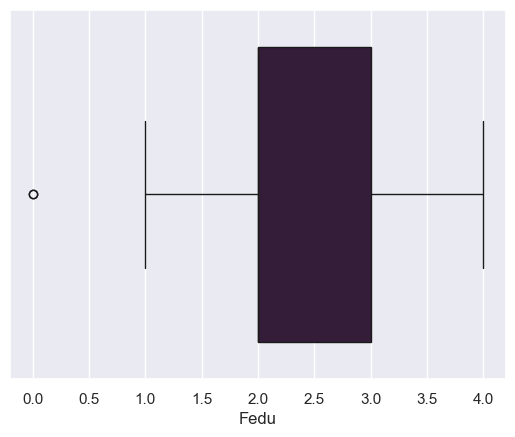

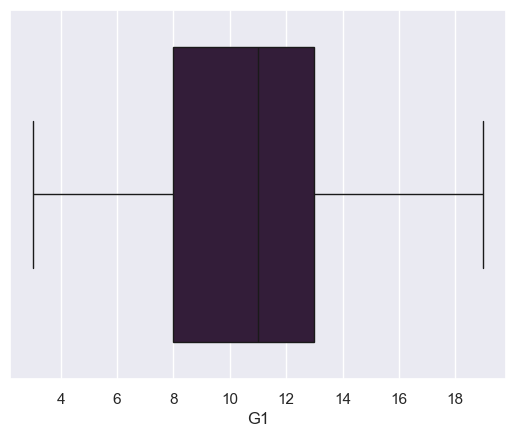

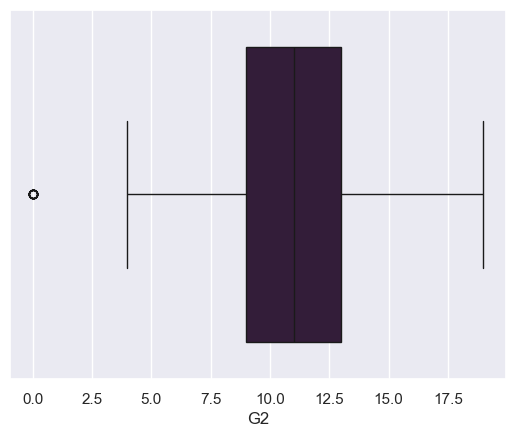

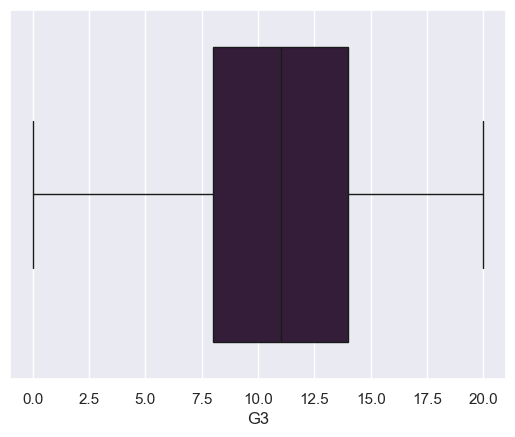

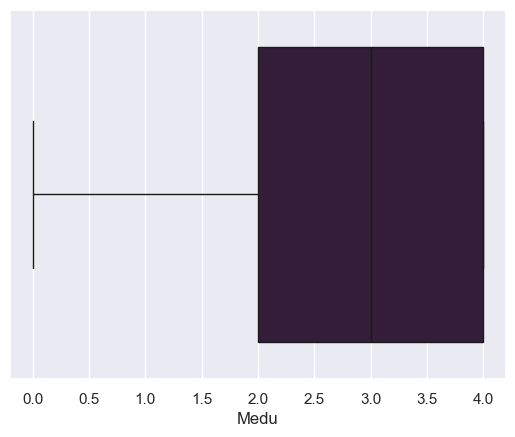

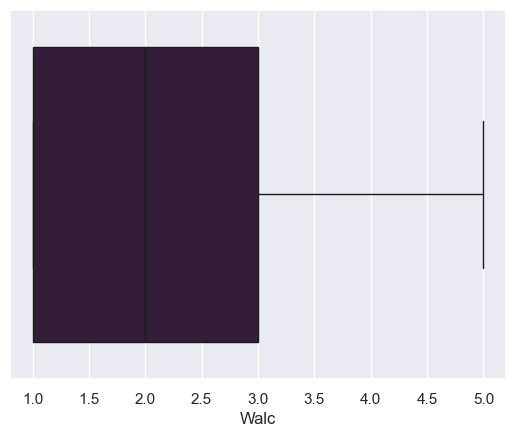

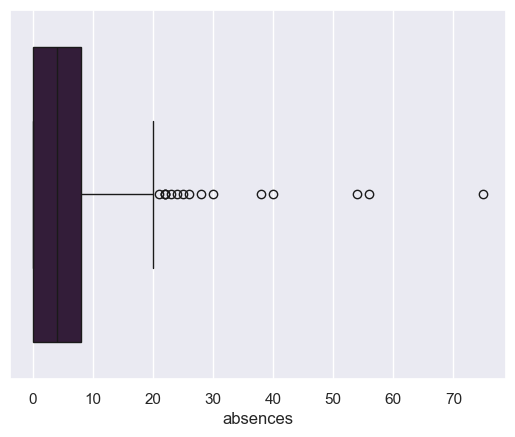

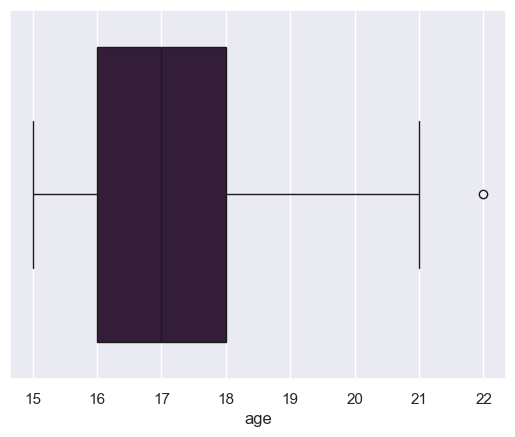

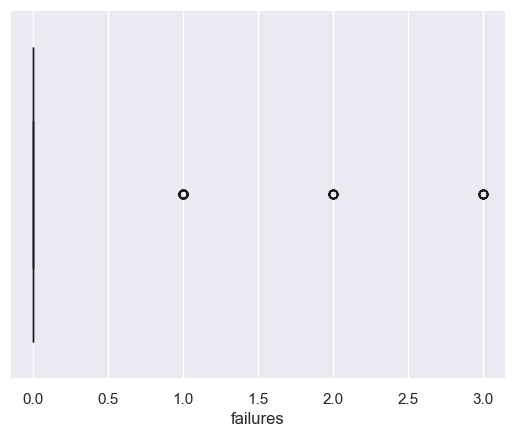

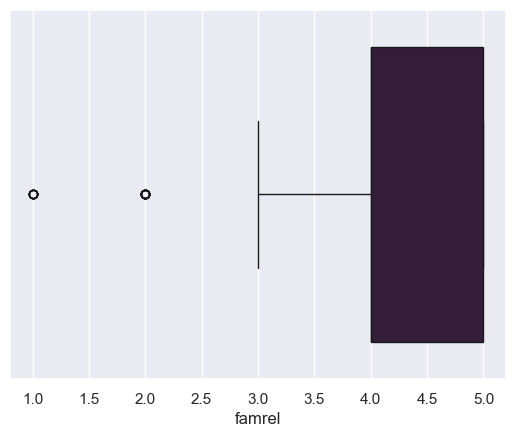

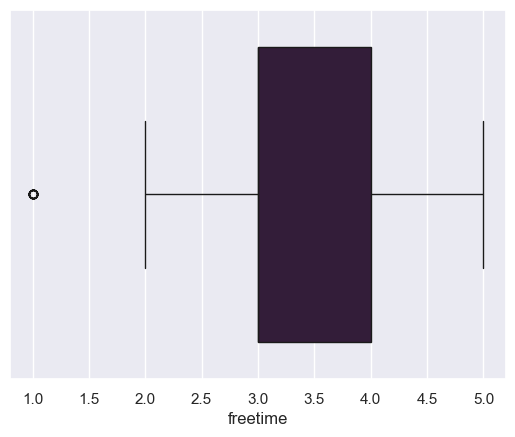

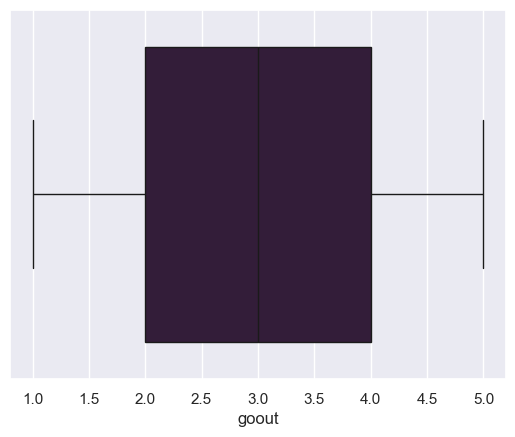

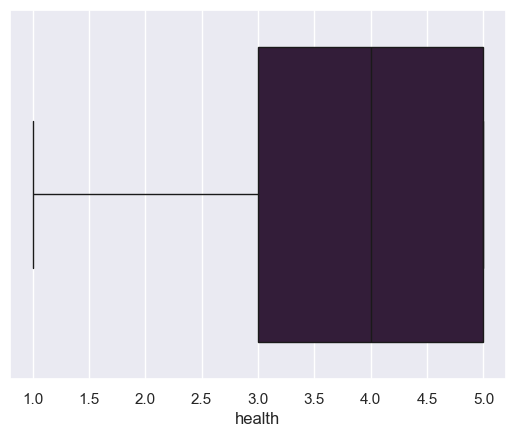

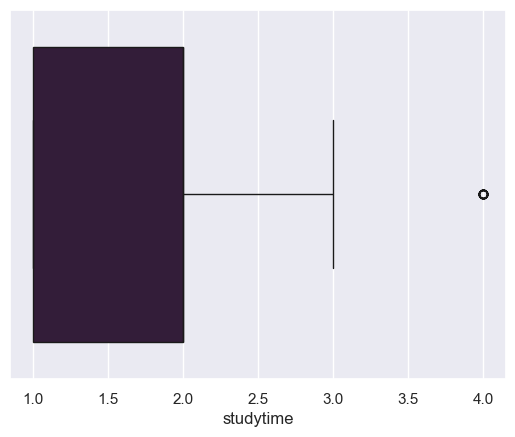

In [16]:
for i in cols_numerical:
    ax=sns.boxplot(x=df[i])
    plt.show()

<Axes: xlabel='G1', ylabel='G2'>

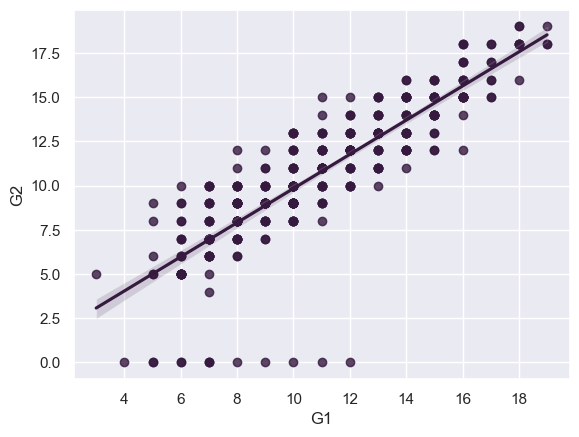

In [17]:
sns.regplot(x="G1", y="G2", data=df)

<Axes: xlabel='G2', ylabel='G3'>

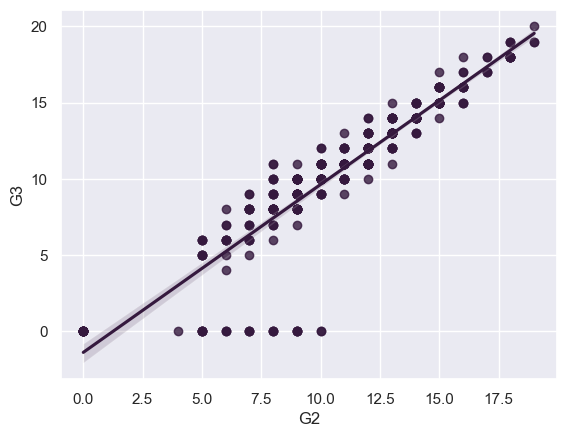

In [18]:
sns.regplot(x="G2", y="G3", data=df)

<Axes: xlabel='G1', ylabel='G3'>

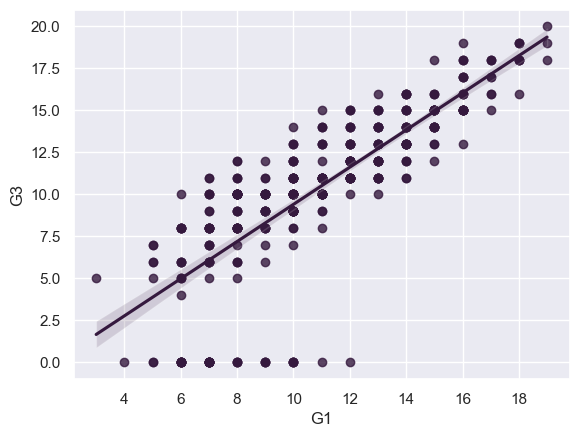

In [19]:
sns.regplot(x="G1", y="G3", data=df)

<Axes: xlabel='Dalc', ylabel='Walc'>

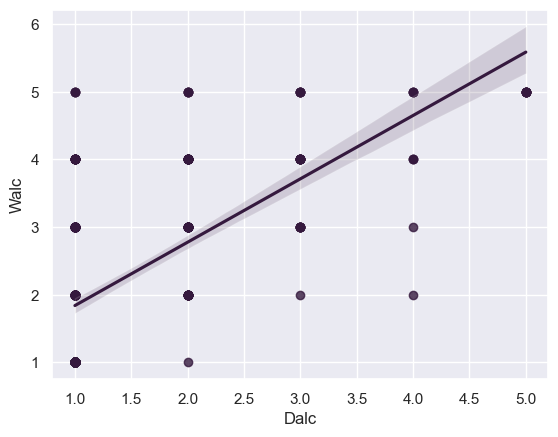

In [20]:
sns.regplot(x="Dalc",y="Walc",data=df)

In [21]:
df['Overall Health'] = (0.5 * df['Dalc'] + 0.5 * df['Walc'] + 2 * df['health'] + df['famrel']) / 4
df['Overall Health']

0      2.750
1      3.000
2      3.125
3      3.500
4      3.875
       ...  
390    4.375
391    2.375
392    3.500
393    4.375
394    4.000
Name: Overall Health, Length: 395, dtype: float64

# Overall Health vs. Grade

[Text(0.5, 1.0, 'Overall Health vs. Grade')]

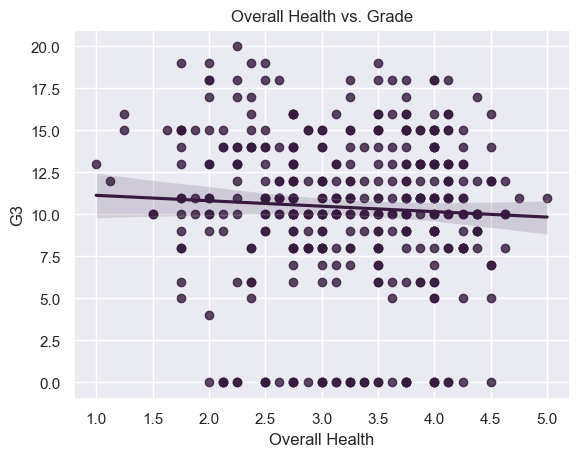

In [22]:
sns.regplot(x='Overall Health', y='G3', data=df).set(title = 'Overall Health vs. Grade')

# Absences vs. Grade

[Text(0.5, 1.0, 'Absences vs G3')]

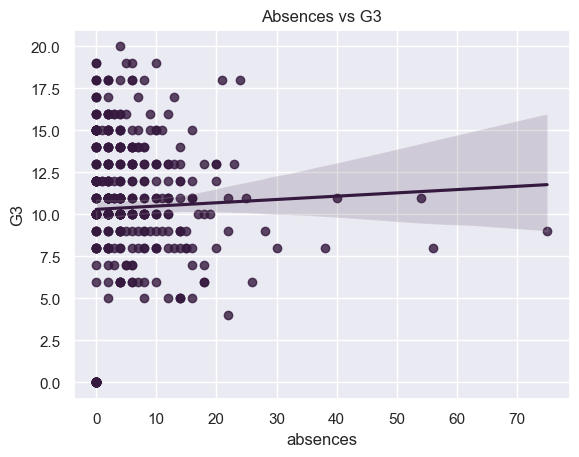

In [23]:
sns.regplot(x='absences', y='G3', data=df).set(title='Absences vs G3')

There seems to be no correlation between Absences and G3 and this is interesting we need to identify the potential cause for this phenomenon, and we need to examine more relationships on Absences to determine the cause.

[Text(0.5, 1.0, 'Absences vs G1')]

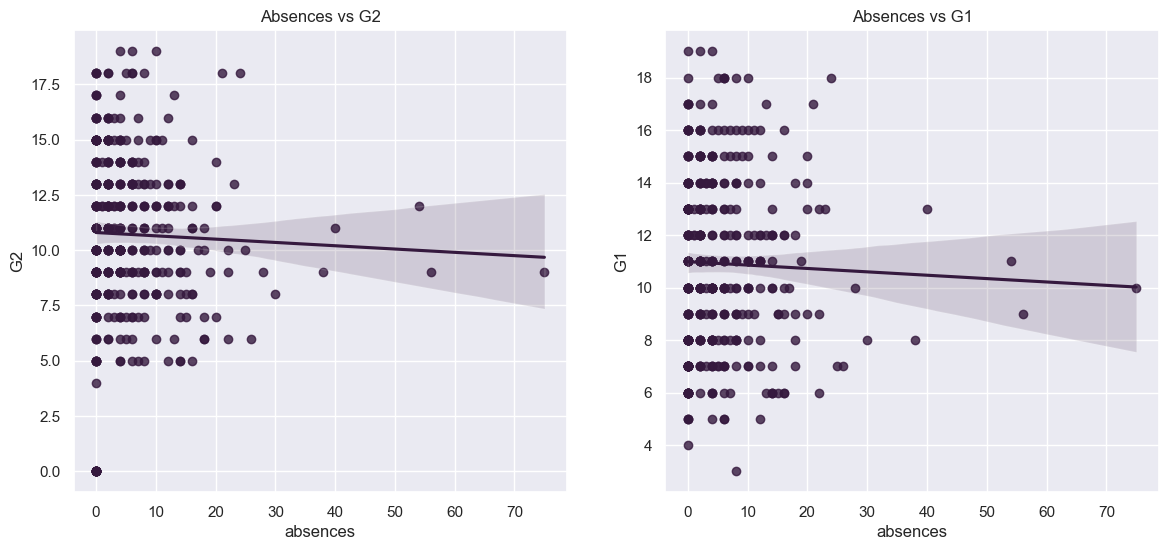

In [24]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
sns.regplot(x='absences', y='G2', data=df, ax=axes[0])
axes[0].set(title='Absences vs G2')

sns.regplot(x='absences', y='G1', data=df, ax=axes[1])
axes[1].set(title='Absences vs G1')

This low correlation is because absent students (usually) revise the material missed, effectively accounting for their absence.

For a further explanation, we need to plot the correlation matrix to validate our hypothesis.

<Axes: >

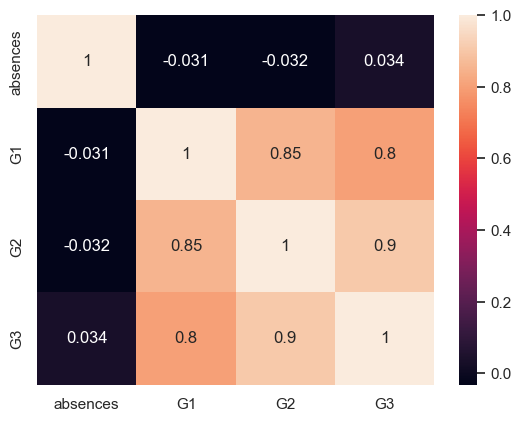

In [25]:
sns.heatmap(df[['absences', 'G1', 'G2', 'G3']].corr(), annot=True)

# Age vs. Grade

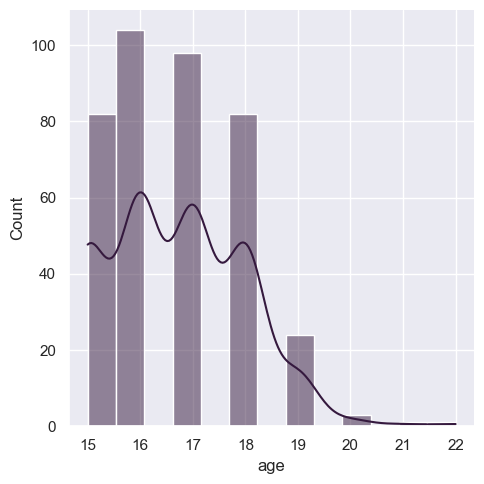

In [26]:
sns.displot(x='age', data=df, kind='hist', kde=True)

In [27]:
age_grade = df.groupby("age").aggregate({'G1': 'mean', 'G2': 'mean', 'G3': 'mean'})
age_grade.reset_index(inplace=True)
age_grade

,age,G1,G2,G3
0,15,11.231707,11.365854,11.256098
1,16,10.942308,11.182692,11.028846
2,17,10.897959,10.479592,10.275510
3,18,10.719512,10.134146,9.548780
4,19,10.250000,9.250000,8.208333
5,20,13.666667,13.666667,14.000000
6,21,10.000000,8.000000,7.000000
7,22,6.000000,8.000000,8.000000


There's an inverse relationship between  age and Grads

C:\Users\Admin\AppData\Local\Temp\ipykernel_10320\1132029766.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_grade, x='age', y=grade, palette='husl').set(xlabel='Age', ylabel=grade, title=f'Age vs. {grade}');


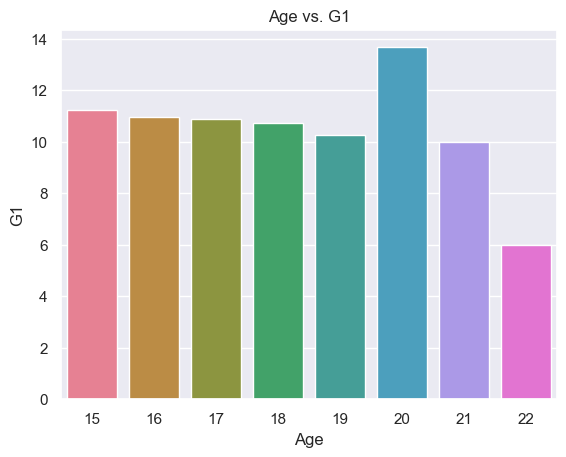

C:\Users\Admin\AppData\Local\Temp\ipykernel_10320\1132029766.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_grade, x='age', y=grade, palette='husl').set(xlabel='Age', ylabel=grade, title=f'Age vs. {grade}');


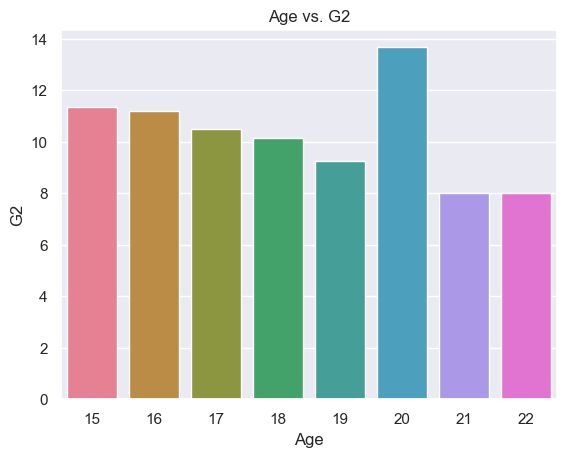

C:\Users\Admin\AppData\Local\Temp\ipykernel_10320\1132029766.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_grade, x='age', y=grade, palette='husl').set(xlabel='Age', ylabel=grade, title=f'Age vs. {grade}');


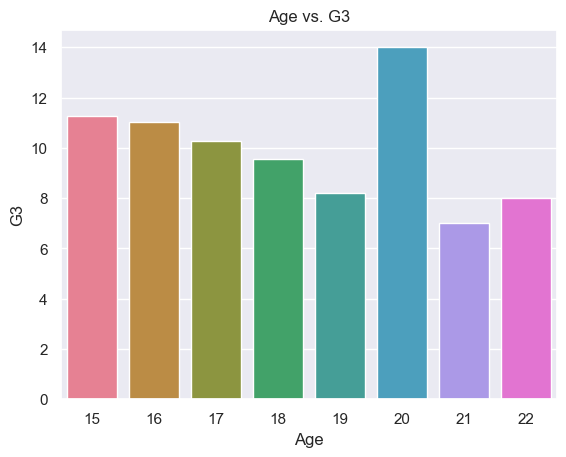

In [28]:
grades = ['G1', 'G2', 'G3']

for grade in grades:
    sns.barplot(data=age_grade, x='age', y=grade, palette='husl').set(xlabel='Age', ylabel=grade, title=f'Age vs. {grade}');
    plt.show();

# Study Time vs. Grade

As expected, students with a greater time productivity have better grades.

<Axes: xlabel='studytime', ylabel='G3'>

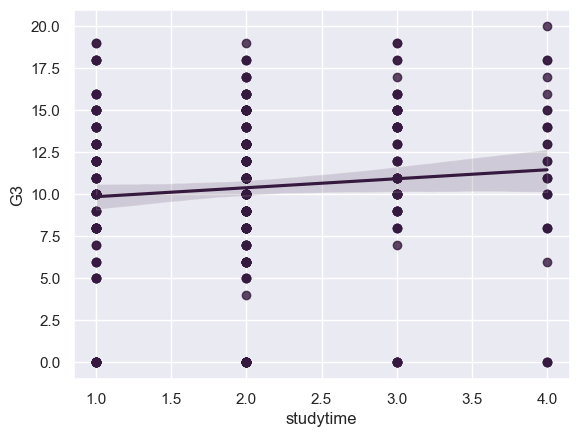

In [29]:
sns.regplot(x='studytime', y='G3', data=df)

# Mothers' Job and Education

In [30]:
MotherJop_Edu = df.groupby("Mjob").aggregate({"Medu": "mean"})
MotherJop_Edu.reset_index(inplace=True)
MotherJop_Edu.sort_values(by='Medu', ascending=False, inplace=True)

In [31]:
MotherJop_Edu

,Mjob,Medu
4,teacher,3.948276
1,health,3.647059
3,services,2.844660
2,other,2.404255
0,at_home,1.711864


C:\Users\Admin\AppData\Local\Temp\ipykernel_10320\3688797638.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mjob', y='Medu', data=MotherJop_Edu , palette='husl').set(xlabel='Job', ylabel='Education Lvl.', title='Job vs. Edu. Lvl. (Mother)');


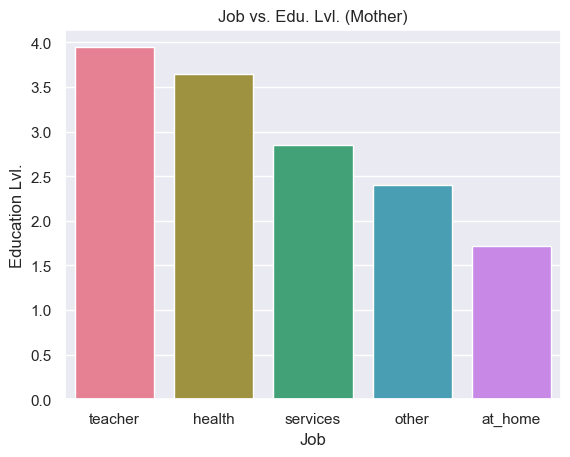

In [32]:
sns.barplot(x='Mjob', y='Medu', data=MotherJop_Edu , palette='husl').set(xlabel='Job', ylabel='Education Lvl.', title='Job vs. Edu. Lvl. (Mother)');

# Fathers' Job and Education

In [33]:
FatherJop_Edu = df.groupby("Fjob").aggregate({"Fedu": "mean"})
FatherJop_Edu.reset_index(inplace=True)
FatherJop_Edu.sort_values(by='Fedu', ascending=False, inplace=True)

In [34]:
FatherJop_Edu

,Fjob,Fedu
4,teacher,3.862069
1,health,3.333333
3,services,2.558559
0,at_home,2.350000
2,other,2.271889


C:\Users\Admin\AppData\Local\Temp\ipykernel_10320\527550825.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fjob', y='Fedu', data=FatherJop_Edu ,palette='husl').set(xlabel='Job', ylabel='Education Lvl.', title='Job vs. Edu. Lvl. (Father)');


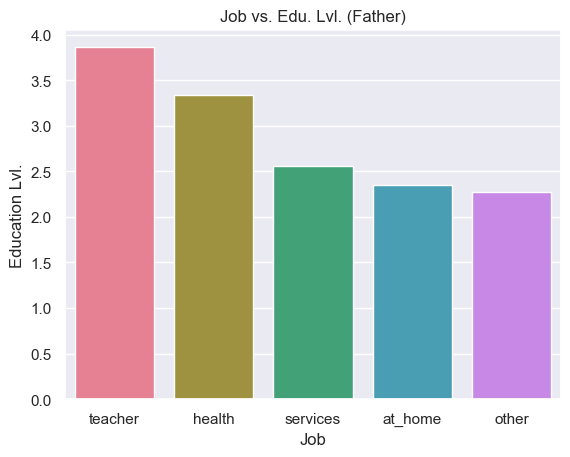

In [35]:
sns.barplot(x='Fjob', y='Fedu', data=FatherJop_Edu ,palette='husl').set(xlabel='Job', ylabel='Education Lvl.', title='Job vs. Edu. Lvl. (Father)');

# Job vs. Grade

### 1. Mothers' Job

In [36]:
MotherJop_Grade = df.groupby('Mjob').aggregate({'G3':'mean'}).reset_index()
MotherJop_Grade

,Mjob,G3
0,at_home,9.152542
1,health,12.147059
2,other,9.822695
3,services,11.019417
4,teacher,11.051724


C:\Users\Admin\AppData\Local\Temp\ipykernel_10320\2582577110.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Mjob' , y='G3' , palette='husl' , data = MotherJop_Grade).set(xlabel='Job', ylabel='G3', title='Job vs. Grade (Mother)');


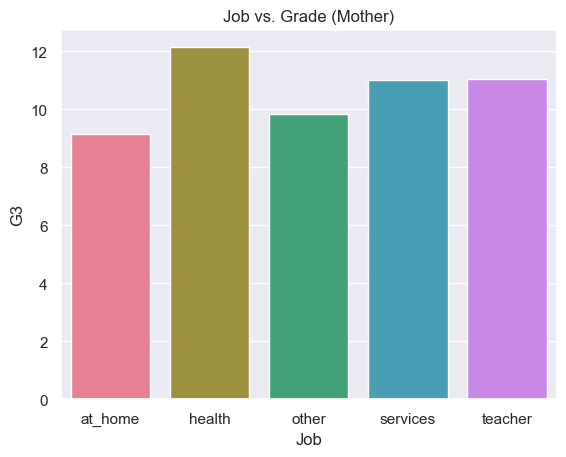

In [37]:
sns.barplot(x = 'Mjob' , y='G3' , palette='husl' , data = MotherJop_Grade).set(xlabel='Job', ylabel='G3', title='Job vs. Grade (Mother)');

### 2. Fathers' Job

In [38]:
FatherJop_Grade = df.groupby('Fjob').aggregate({'G3':'mean'}).reset_index()
FatherJop_Grade

,Fjob,G3
0,at_home,10.150000
1,health,11.611111
2,other,10.193548
3,services,10.297297
4,teacher,11.965517


C:\Users\Admin\AppData\Local\Temp\ipykernel_10320\561097480.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fjob', y='G3', data=FatherJop_Grade , palette='husl').set(xlabel='Job', ylabel='Grade3', title='Job vs. Grade (Father)');


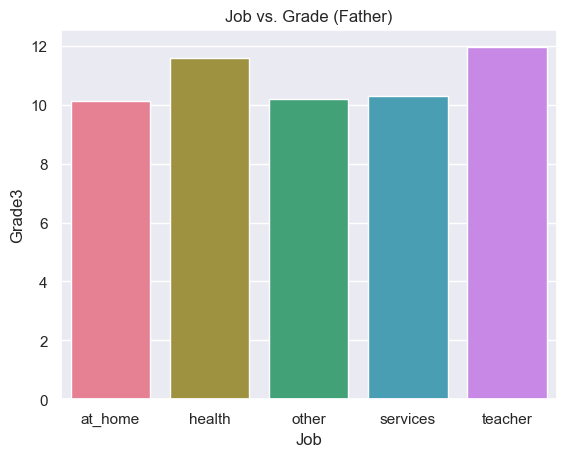

In [39]:
sns.barplot(x='Fjob', y='G3', data=FatherJop_Grade , palette='husl').set(xlabel='Job', ylabel='Grade3', title='Job vs. Grade (Father)');

# Family Size vs. Grade

In [40]:
Family_size_grade = df.groupby("famsize").aggregate({"G1": "mean", "G2": "mean", "G3": "mean"}).reset_index()
Family_size_grade

,famsize,G1,G2,G3
0,GT3,10.758007,10.519573,10.177936
1,LE3,11.280702,11.192982,11.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_10320\2992078065.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Family_size_grade, x='famsize', y=grade, palette='husl').set(xlabel='Family Size', ylabel=grade, title=f'Family Size vs. {grade}');


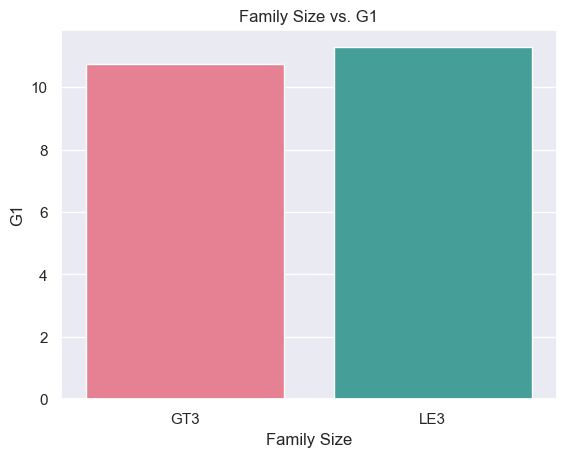

C:\Users\Admin\AppData\Local\Temp\ipykernel_10320\2992078065.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Family_size_grade, x='famsize', y=grade, palette='husl').set(xlabel='Family Size', ylabel=grade, title=f'Family Size vs. {grade}');


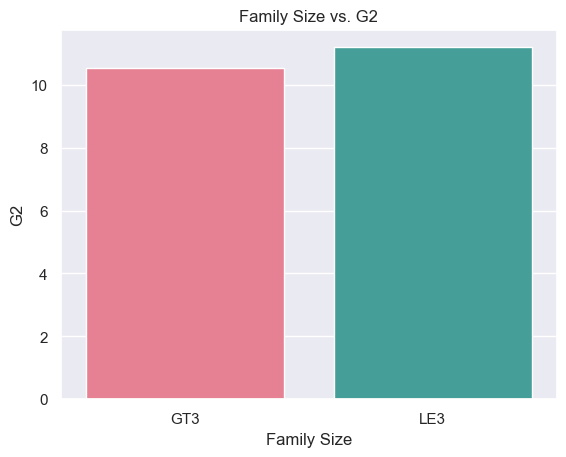

C:\Users\Admin\AppData\Local\Temp\ipykernel_10320\2992078065.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Family_size_grade, x='famsize', y=grade, palette='husl').set(xlabel='Family Size', ylabel=grade, title=f'Family Size vs. {grade}');


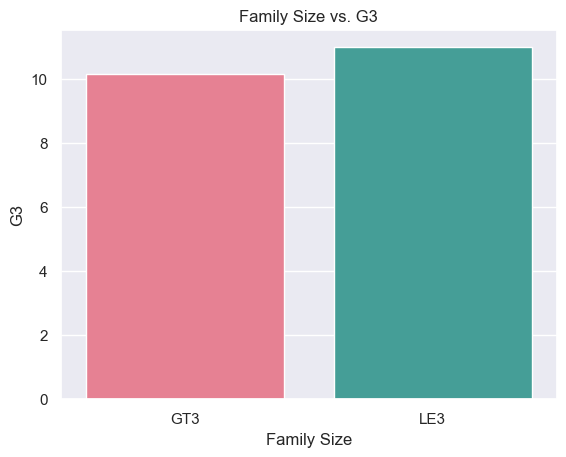

In [41]:
for grade in grades:
    sns.barplot(data=Family_size_grade, x='famsize', y=grade, palette='husl').set(xlabel='Family Size', ylabel=grade, title=f'Family Size vs. {grade}');
    plt.show();

# Activites vs. Grade
This section explores the relationship between the amount of social interaction a person undergoes and how said person scores on an exam.

In [42]:
act_gr = df.groupby("activities").aggregate({"G1": "mean", "G2": "mean", "G3": "mean"}).reset_index()
act_gr

,activities,G1,G2,G3
0,no,10.716495,10.520619,10.340206
1,yes,11.094527,10.900498,10.487562


C:\Users\Admin\AppData\Local\Temp\ipykernel_10320\2596086481.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=act_gr, x='activities', y=grade, palette='husl').set(xlabel='Activites', ylabel=grade, title=f'Activites vs. {grade}');


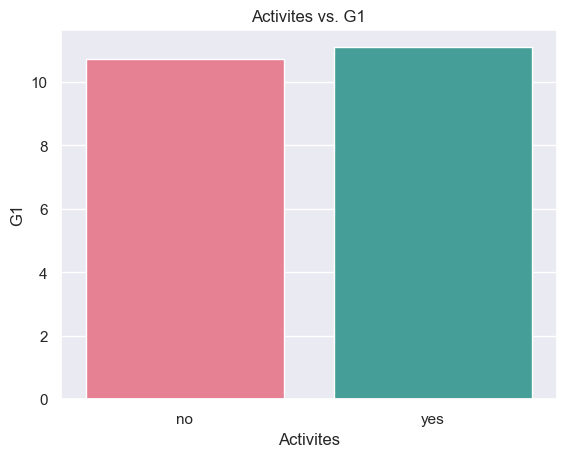

C:\Users\Admin\AppData\Local\Temp\ipykernel_10320\2596086481.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=act_gr, x='activities', y=grade, palette='husl').set(xlabel='Activites', ylabel=grade, title=f'Activites vs. {grade}');


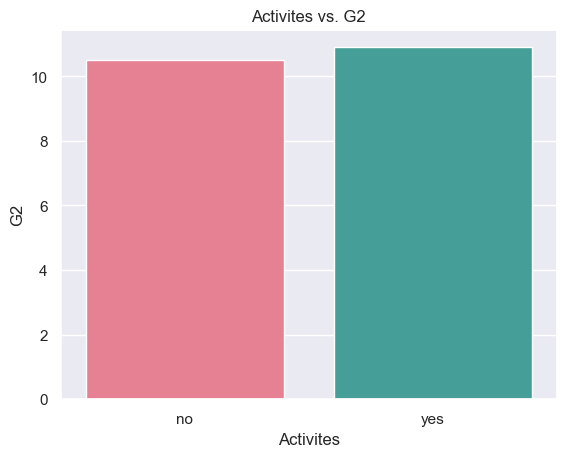

C:\Users\Admin\AppData\Local\Temp\ipykernel_10320\2596086481.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=act_gr, x='activities', y=grade, palette='husl').set(xlabel='Activites', ylabel=grade, title=f'Activites vs. {grade}');


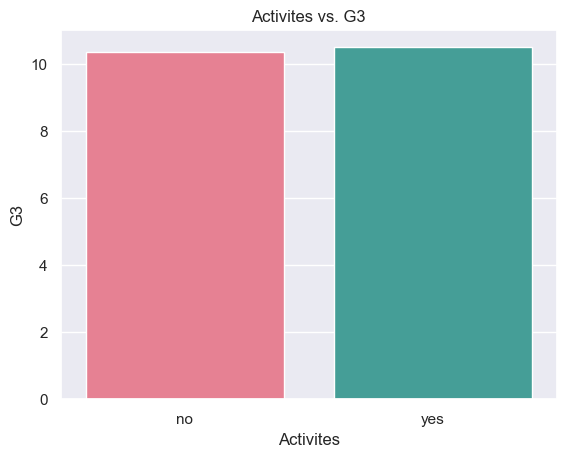

In [43]:
for grade in grades:
    sns.barplot(data=act_gr, x='activities', y=grade, palette='husl').set(xlabel='Activites', ylabel=grade, title=f'Activites vs. {grade}');
    plt.show();

# Go out vs Grades

In [44]:
out_gr = df.groupby("goout").aggregate({"G1": "mean", "G2": "mean", "G3": "mean"}).reset_index()
out_gr

,goout,G1,G2,G3
0,1,11.130435,10.782609,9.869565
1,2,11.368932,11.456311,11.194175
2,3,11.276923,11.053846,10.961538
3,4,10.430233,10.058140,9.651163
4,5,9.792453,9.471698,9.037736


C:\Users\Admin\AppData\Local\Temp\ipykernel_10320\1452428815.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=out_gr, x='goout', y=grade, palette='rocket')


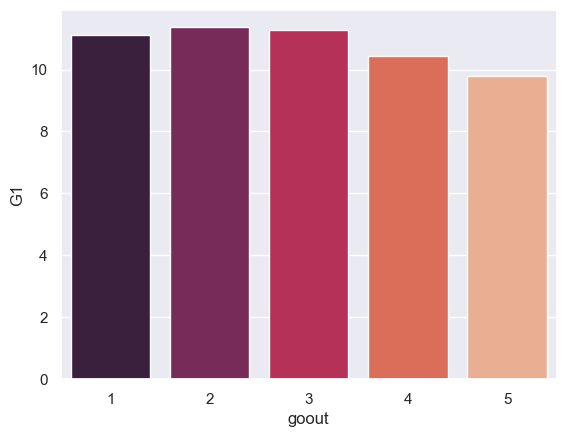

C:\Users\Admin\AppData\Local\Temp\ipykernel_10320\1452428815.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=out_gr, x='goout', y=grade, palette='rocket')


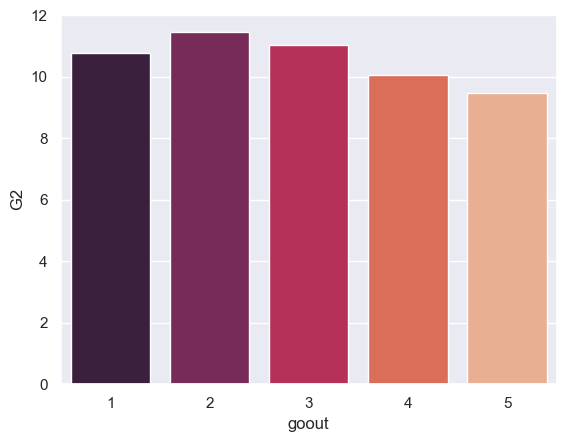

C:\Users\Admin\AppData\Local\Temp\ipykernel_10320\1452428815.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=out_gr, x='goout', y=grade, palette='rocket')


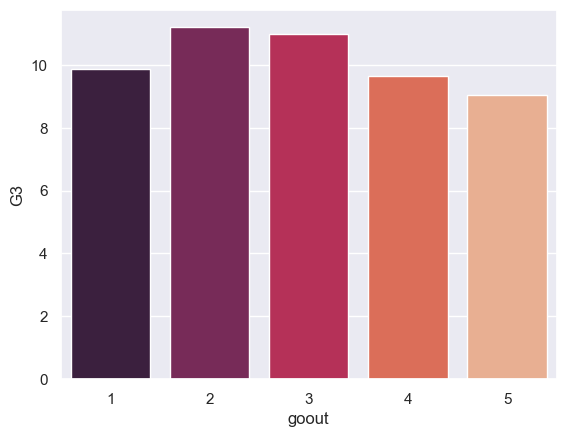

In [45]:
for grade in grades:
    sns.barplot(data=out_gr, x='goout', y=grade, palette='rocket')
    plt.show()

# Data Pre-Processing


In [46]:
categorical_col = df.select_dtypes(include=['object']).columns.tolist()
numerical_col = df.select_dtypes(include=['number']).columns.tolist()
categorical_col

['sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,MinMaxScaler

### Label encoding


In [48]:
new_df = pd.get_dummies(df, columns=['sex','address','famsize','Pstatus','Mjob','Fjob','schoolsup','famsup','paid','activities','nursery','higher','internet',
 'romantic'])

In [49]:
new_df.columns

Index(['age', 'Medu', 'Fedu', 'studytime', 'failures', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3',
       'Overall Health', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'schoolsup_no', 'schoolsup_yes', 'famsup_no',
       'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no',
       'internet_yes', 'romantic_no', 'romantic_yes'],
      dtype='object')

In [50]:
new_df.head()

,age,Medu,Fedu,studytime,failures,famrel,freetime,goout,Dalc,Walc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,0,4,3,4,1,1,...,True,False,False,True,False,True,True,False,True,False
1,17,1,1,2,0,5,3,3,1,1,...,True,False,True,False,False,True,False,True,True,False
2,15,1,1,2,3,4,3,2,2,3,...,True,False,False,True,False,True,False,True,True,False
3,15,4,2,3,0,3,2,2,1,1,...,False,True,False,True,False,True,False,True,False,True
4,16,3,3,2,0,4,3,2,1,2,...,True,False,False,True,False,True,True,False,True,False


In [51]:
X = new_df.drop('G3', axis=1).values
y = new_df['G3'].values

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((276, 49), (276,), (119, 49), (119,))

In [53]:
X_test.T

array([[17, 18, 18, ..., 18, 17, 16],
       [2, 1, 3, ..., 3, 2, 4],
       [1, 2, 3, ..., 2, 3, 4],
       ...,
       [True, True, True, ..., True, False, True],
       [True, False, False, ..., True, True, False],
       [False, True, True, ..., False, False, True]], dtype=object)

In [54]:
# Scaling the data using pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
X_test

array([[ 0.21668659, -0.69162477, -1.41883525, ...,  0.42959208,
         0.72447352, -0.72447352],
       [ 0.99338138, -1.62735241, -0.47975005, ...,  0.42959208,
        -1.3803127 ,  1.3803127 ],
       [ 0.99338138,  0.24410286,  0.45933515, ...,  0.42959208,
        -1.3803127 ,  1.3803127 ],
       ...,
       [ 0.99338138,  0.24410286, -0.47975005, ...,  0.42959208,
         0.72447352, -0.72447352],
       [ 0.21668659, -0.69162477,  0.45933515, ..., -2.32778965,
         0.72447352, -0.72447352],
       [-0.5600082 ,  1.1798305 ,  1.39842035, ...,  0.42959208,
        -1.3803127 ,  1.3803127 ]])

In [55]:
# Sau khi fit scaler ở bước train:
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(pipeline.named_steps['std_scalar'], f)

# Modling

In [56]:
lin_reg = LinearRegression()

lin_reg.fit(X_train,y_train)

LinearRegression()

In [57]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [58]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)



Test set evaluation:
_____________________________________
MAE: 1.4589417415146577
MSE: 4.655636376786181
RMSE: 2.157692373065767
R2 Square 0.788207490389385
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.140039655479963
MSE: 2.8455258042432217
RMSE: 1.6868686387040401
R2 Square 0.8610582675906991
__________________________________


In [59]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,1.458942,4.655636,2.157692,0.788207,0.795447


In [60]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_6 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), cross_val(RandomForestRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])


Test set evaluation:
_____________________________________
MAE: 1.0502773109243697
MSE: 2.9286485462184877
RMSE: 1.7113294674662993
R2 Square 0.8667709900060394
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.35861956521739136
MSE: 0.33848447463768117
RMSE: 0.5817941858060126
R2 Square 0.983472432676702
__________________________________


In [61]:
# import pickle

# with open("SP_rf.pkl", "rb") as f:
#     rf_model = pickle.load(f)

# print("Số lượng đặc trưng đầu vào của mô hình:", rf_model.n_features_in_)


In [62]:
results_df = pd.merge(results_df , results_df_6 , how='outer')
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,1.458942,4.655636,2.157692,0.788207,0.795447
1,Random Forest Regressor,1.050277,2.928649,1.711329,0.866771,0.846259


In [63]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_7 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), cross_val(SVR())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])

Test set evaluation:
_____________________________________
MAE: 1.7239132611946086
MSE: 6.317002375908344
RMSE: 2.513364751863196
R2 Square 0.7126292351608863
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0010713042761541752
MSE: 1.198805399710968e-06
RMSE: 0.001094899721303722
R2 Square 0.9999999414645621
__________________________________


In [64]:
results_df = pd.merge(results_df , results_df_7 , how='outer')
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,1.458942,4.655636,2.157692,0.788207,0.795447
1,Random Forest Regressor,1.050277,2.928649,1.711329,0.866771,0.846259
2,SVM Regressor,1.723913,6.317002,2.513365,0.712629,0.792522


Text(0.5, 0, 'R2')

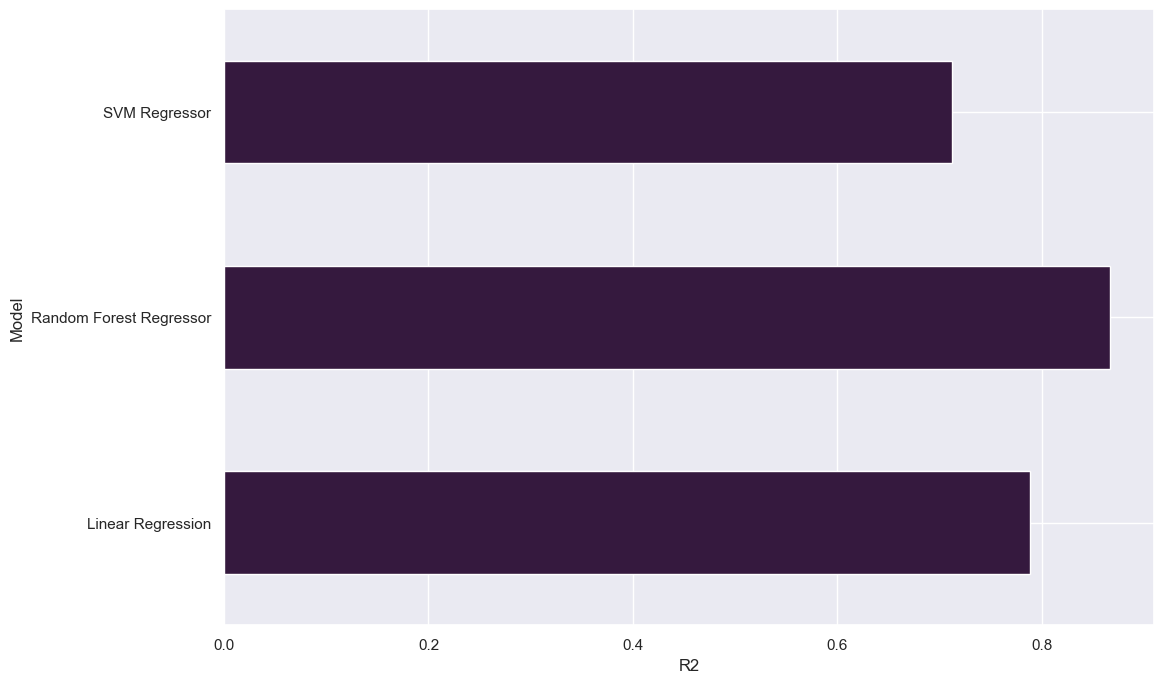

In [65]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))
plt.xlabel('R2')

# Feature Selection

In [66]:
X = new_df.drop('G3', axis=1)
y = new_df['G3']
X

,age,Medu,Fedu,studytime,failures,famrel,freetime,goout,Dalc,Walc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,0,4,3,4,1,1,...,True,False,False,True,False,True,True,False,True,False
1,17,1,1,2,0,5,3,3,1,1,...,True,False,True,False,False,True,False,True,True,False
2,15,1,1,2,3,4,3,2,2,3,...,True,False,False,True,False,True,False,True,True,False
3,15,4,2,3,0,3,2,2,1,1,...,False,True,False,True,False,True,False,True,False,True
4,16,3,3,2,0,4,3,2,1,2,...,True,False,False,True,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,2,2,5,5,4,4,5,...,True,False,False,True,False,True,True,False,True,False
391,17,3,1,1,0,2,4,5,3,4,...,True,False,True,False,False,True,False,True,True,False
392,21,1,1,1,3,5,5,3,3,3,...,True,False,True,False,False,True,True,False,True,False
393,18,3,2,1,0,4,4,1,3,4,...,True,False,True,False,False,True,False,True,True,False


In [67]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [68]:
print(selection.feature_importances_)

[8.59621840e-03 3.67057069e-03 3.02585493e-03 1.30756806e-02
 8.33464426e-03 6.50422461e-03 4.27687118e-03 6.22814730e-03
 2.99371463e-03 4.75500637e-03 6.74150939e-03 3.66072787e-02
 2.41443334e-01 5.77973022e-01 8.32077742e-03 1.61020955e-03
 1.46564168e-03 9.06685505e-04 9.84671966e-04 1.85179427e-03
 1.45300596e-03 4.22135795e-04 2.51772458e-04 3.76374815e-03
 2.12184012e-03 1.96080423e-03 2.72389963e-03 1.76102109e-03
 3.26328756e-03 8.19907156e-04 3.14792205e-03 6.37753899e-03
 6.10503584e-04 1.87828733e-03 1.69015461e-03 1.29119568e-03
 1.32662826e-03 1.16159933e-03 1.38700918e-03 3.29898141e-03
 3.24390565e-03 2.12829430e-03 2.66286816e-03 2.09875726e-03
 1.37009292e-03 1.44102522e-03 7.05839450e-04 3.26449114e-03
 3.00762551e-03]


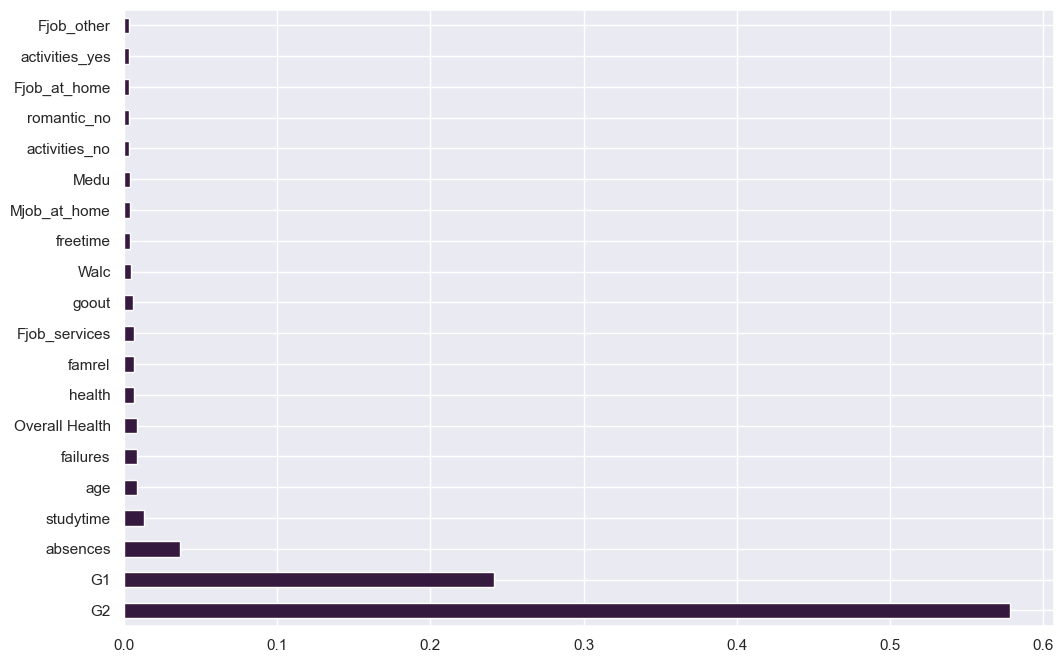

In [69]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [70]:
X = df[['absences', 'G1', 'G2']]
y = df[['G3']]

In [71]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train,y_train)

LinearRegression()

In [72]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 1.4589417415146577
MSE: 4.655636376786181
RMSE: 2.157692373065767
R2 Square 0.788207490389385
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.140039655479963
MSE: 2.8455258042432217
RMSE: 1.6868686387040401
R2 Square 0.8610582675906991
__________________________________


In [73]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), cross_val(RandomForestRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])

Test set evaluation:
_____________________________________
MAE: 1.0525126050420168
MSE: 2.9043779411764703
RMSE: 1.7042235596236985
R2 Square 0.8678750995059238
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.3626195652173913
MSE: 0.3384361413043478
RMSE: 0.5817526461515649
R2 Square 0.9834747927034698
__________________________________


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConvers

In [74]:
results_df = pd.merge(results_df , results_df_2 , how='outer')
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,1.458942,4.655636,2.157692,0.788207,0.816105
1,Random Forest Regressor,1.052513,2.904378,1.704224,0.867875,0.807376


In [75]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), cross_val(SVR())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])

Test set evaluation:
_____________________________________
MAE: 1.7239132611946086
MSE: 6.317002375908344
RMSE: 2.513364751863196
R2 Square 0.7126292351608863
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0010713042761541752
MSE: 1.198805399710968e-06
RMSE: 0.001094899721303722
R2 Square 0.9999999414645621
__________________________________


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataC

In [76]:
results_df = pd.merge(results_df , results_df_2 , how='outer')
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,1.458942,4.655636,2.157692,0.788207,0.816105
1,Random Forest Regressor,1.052513,2.904378,1.704224,0.867875,0.807376
2,SVM Regressor,1.723913,6.317002,2.513365,0.712629,0.816486


Text(0.5, 0, 'R2')

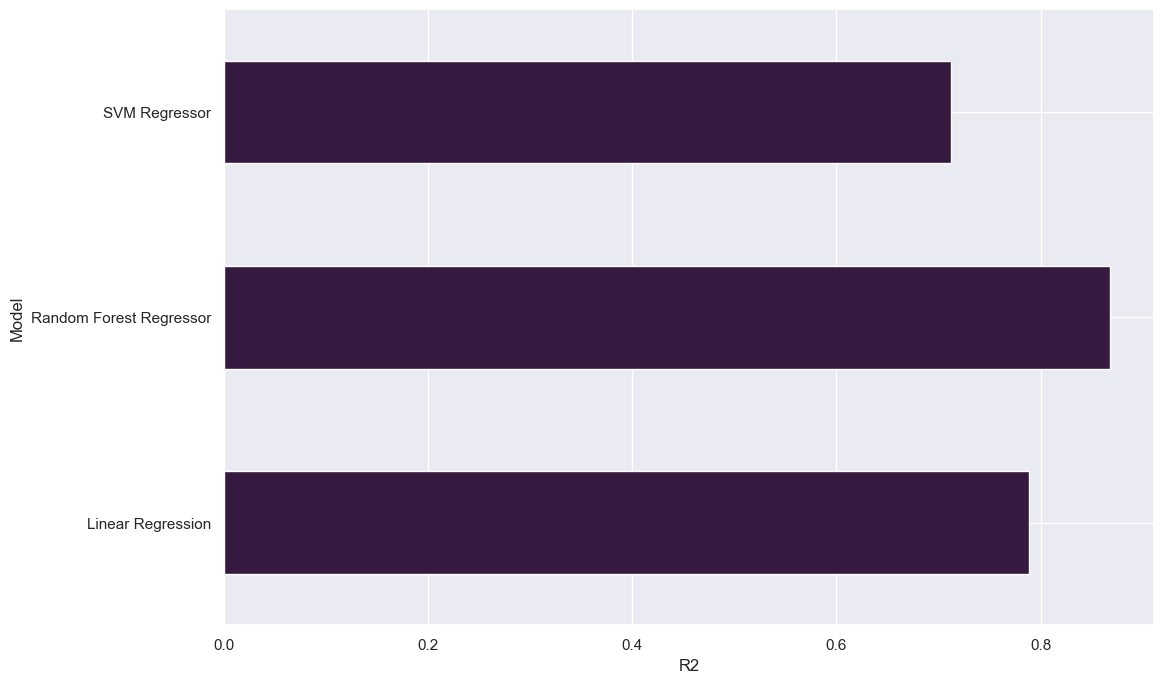

In [77]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))
plt.xlabel('R2')

# Save the Weights of the model 

In [78]:
import pickle
# open a file, where you ant to store the data
file = open('SP_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_reg, file)